# Part I - (Exploration of Loan Dataset from Prosper)
## by (Ishola Olufunmi Abiodun)

## Introduction
> In this project, the [loan dataset from prosper](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000) would be explored. From the exploration, insights which would be used to answer thriving questions would be drawn and used alongside different visualizations to aid better communications of the results.
> The dataset consists of approximately 113937 rows and 81 columns including: LoanOriginalAmount, Term, BorrowerRate/ interest rate, etc. The [feature documentation](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000) contains the meaning of each variable in the dataset.
> During the exploration of this dataset, I would be interested in knowing the factors that influence loan status; the possibility that the current loan would become completed, chargedoff, daefaulted or past due. Also, I would like to know how other variables in the dataset influence themselves.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load in the dataset and name it 'df_unclean' for referernce purpose
df_unclean = pd.read_csv('Prosper_Loan_Data.csv')

In [3]:
# check the shape of the dataset
df_unclean.shape

(113937, 81)

In [4]:
#check the propoerties of the dataset
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#briefly assess dataset
df_unclean.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
#check the summary statistics of the dataset
df_unclean.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
#check for any duplications in the dataset
df_unclean.duplicated().any()

False

### What is the structure of the dataset?

> The dataset contains approximately 113937 loans with 81 variables on each loan. Most of the variables are numeric, few are strings(words) and others are boolean. The main variable with missing data is the **BorrowerAPR** while other variables with missing data are irrelevant to the analysis.
> There are no duplicates in the data
> From the summary statistics above, we could see that the mean loan amount was $6500 and the mean APR was 0.18% that is about 0.0028% of the loan amount. This would be explored in details later.

### What is/are the main feature(s) of interest in the dataset?

> I am interested in knowing the factors that influence loan statuses

### What features in the dataset do you think will help support your investigation into the feature(s) of interest?

> I expect the _**loan amount**_, _**interest rate**_, _**annual percentage rate**_, _**terms of loans**_, and possibly _**income range**_ to influence the status of loans either positively or negatively.

## Data Wrangling
> The dataset appeared not to be very clean. Hence, few wrangling steps would be carried out.
> The wrangling process would be documented using the `define-code-test` format, where `define` means the defined issue, `code` is the code/ solution to the issue and `test` means testing to see if the code works as expected.
<p> Before the wrangling processes, the original dataset would be copied and saved for reference purpose.</p>

In [8]:
df = df_unclean.copy()

#### Define:
The BorrowerAPR has some missing values

In [9]:
# check the missing rows
df[df['BorrowerAPR'].isna()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2543,044B3365298516680DA929B,36,2005-11-28 22:42:42.557000000,HR,36,Completed,2006-01-06 00:00:00,NaN,0.10000,0.0950,...,-4.02,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
14632,E4103364750435927B6F892,67,2006-01-06 12:54:51.887000000,AA,36,Completed,2006-04-10 00:00:00,NaN,0.06500,0.0550,...,-2.59,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
25166,B3083364738592238DBDA63,6,2005-11-15 16:06:47.457000000,AA,36,Completed,2005-11-29 00:00:00,NaN,0.04350,0.0385,...,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,3
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810000000,AA,36,Completed,2006-03-21 00:00:00,NaN,0.06395,0.0552,...,-1.30,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,4
29773,3480336511078238810A782,21,2005-11-18 14:48:19.753000000,AA,36,Completed,2008-06-05 00:00:00,NaN,0.06000,0.0550,...,-16.08,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,10
39870,B6E73366056348939D8801F,24,2005-11-20 14:45:55.193000000,C,36,Completed,2006-10-24 00:00:00,NaN,0.12000,0.1150,...,-53.96,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,6
43587,2F123364529418907A58D4C,19,2005-11-18 14:16:59.093000000,AA,36,Completed,2005-11-29 00:00:00,NaN,0.08500,0.0750,...,-1.10,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,6
62297,2F25336514614362295DA03,7,2005-11-15 18:25:56.107000000,E,36,Completed,2005-11-30 00:00:00,NaN,0.17000,0.1150,...,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,1
71280,DED033645500376547AF34E,60,2005-12-29 19:53:41,C,36,Completed,2008-04-21 00:00:00,NaN,0.09000,0.0850,...,-74.98,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,8
71875,F50A33647261871547E3E0D,68,2006-01-06 13:05:50.890000000,AA,36,Completed,2006-07-11 00:00:00,NaN,0.07000,0.0650,...,-6.01,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,1


> Since there are just about 25 missing rows, the rows would be dropped as they might cause biases in the dataset.

#### Code:

In [10]:
df.drop(index = (df[df['BorrowerAPR'].isna()].index), axis = 0, inplace = True)

#### Test:

In [11]:
df[df['BorrowerAPR'].isna()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


#### Define:
The dataset contains variables with few values; some variables were within certain year ranges and not across all the years the dataset was gathered for. Variables like these and some not needed for the project analyses would be dropped and only the variables needed would be assigned to the dataframe

#### Code:

In [12]:
df = df[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate','IsBorrowerHomeowner','EmploymentStatusDuration',
       'ListingCategory (numeric)', 'BankcardUtilization', 'InvestmentFromFriendsAmount', 'LoanOriginationQuarter',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years','Investors', 'LoanOriginalAmount',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable','MonthlyLoanPayment','StatedMonthlyIncome']]

#### Test:

In [13]:
df.columns

Index(['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate',
       'IsBorrowerHomeowner', 'EmploymentStatusDuration',
       'ListingCategory (numeric)', 'BankcardUtilization',
       'InvestmentFromFriendsAmount', 'LoanOriginationQuarter',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'Investors', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'MonthlyLoanPayment', 'StatedMonthlyIncome'],
      dtype='object')

#### Define:
Past due statuses in `LoanStatus` variable were entered in such a way that could make visualizations difficult. Hence, `map()` function would be used to group the past due statuses into >3months or <3months

#### Code:

In [14]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [15]:
def maps(col_name, to_map):
    """Function takes two arguments and return mapped values"""
    df[col_name] = df[col_name].map(to_map).fillna(df[col_name])
    return df[col_name].unique()

In [16]:
status = {'Past Due (1-15 days)': 'Past Due(< 3 months)', 'Past Due (16-30 days)': 'Past Due(< 3 months)',
         'Past Due (31-60 days)': 'Past Due(< 3 months)', 'Past Due (61-90 days)': 'Past Due(< 3 months)',
          'Past Due (91-120 days)':'Past Due(> 3 months)', 'Past Due (>120 days)':'Past Due(> 3 months)'}

In [17]:
#Test:
maps('LoanStatus', status)

array(['Completed', 'Current', 'Past Due(< 3 months)', 'Defaulted',
       'Chargedoff', 'Cancelled', 'Past Due(> 3 months)',
       'FinalPaymentInProgress'], dtype=object)

#### Define:
The `ListingCategory (numeric)` variable had categories listed in numbers. If left as such might make insights difficult to be drawn. Hence, using `map()` function, the representation of each number would be assigned.

#### Code:

In [18]:
listing_category = {0 :'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement',
                    3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other',
                    8 : 'Baby & Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',
                    11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
                    14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 
                    18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

In [19]:
#Test:
maps('ListingCategory (numeric)', listing_category)

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby & Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

### Define:
Rename the 'ListingCategory (numeric)' to just 'Listingcategory' since the values have been mapped from integers to objects.

### Code:

In [20]:
df = df.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'})

### Test:

In [21]:
assert 'ListingCategory (numeric)' not in df.columns.values

### Define:
The income range variable needs to be re-mapped for easy understanding

### Code:

In [22]:
income_range = {'$25,000-49,999':'$25k-49k', '$50,000-74,999':'$50k-74k', '$100,000+':'above 100k',
                '$75,000-99,999':'$75k-99k', '$1-24,999':'$1-24k'}

In [23]:
#test
maps('IncomeRange',income_range)

array(['$25k-49k', '$50k-74k', 'Not displayed', 'above 100k', '$75k-99k',
       '$1-24k', 'Not employed', '$0'], dtype=object)

#### Define:
The `LoanOriginationQuarter` column has both the quarter and the year merged together. For easier analyses, these would be separated to include just the quarter.

#### Code:

In [24]:
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].apply(lambda x: x.split(" ")[0])

#### Test:

In [25]:
df['LoanOriginationQuarter'].unique()

array(['Q3', 'Q1', 'Q4', 'Q2'], dtype=object)

In [26]:
#### Define:

## Univariate Exploration

> In this section, distributions of individual variables of interest would be investigated to answer the question- How was each variable distributed across the dataset?

In [27]:
#explore the distribution of the loan amount variable
def hist(col, title, xlabel, **kwargs):
    """function takes arguments to create an histogram"""
    plt.figure(figsize = (10,5))
    plt.hist(df[col], **kwargs)
    plt.title(title,  fontsize = 15)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel('Frequency',  fontsize = 15);

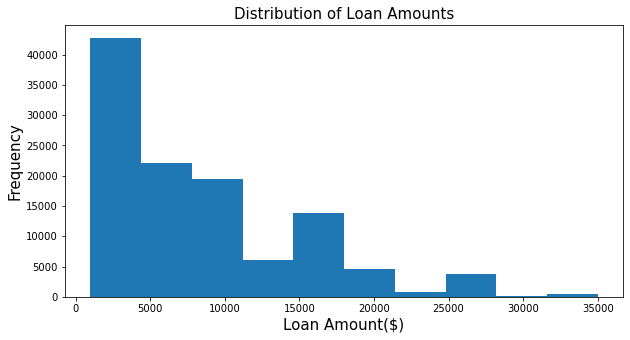

In [28]:
hist('LoanOriginalAmount', 'Distribution of Loan Amounts', 'Loan Amount($)')

> The distribution of loan amounts seemed skewed to the right (using the default bins = 10 of matplotlib). This signified that as loan amount increases, the frequency reduces. Viewing the distribution in a more deeper sence, the bin size would be changed;

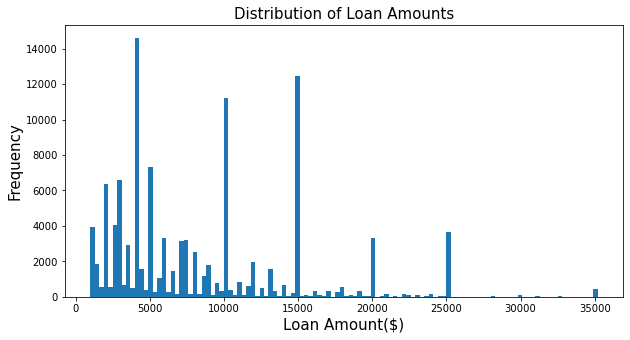

In [29]:
hist('LoanOriginalAmount', 'Distribution of Loan Amounts', 'Loan Amount($)',
     bins = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+300, 300))

> With the bins sizes changed, the distribution is much more clearer. From the visual, loan amounts seemed unimodal with the highest peak at about \\$4k. \\$15k seemed to have the next highest frequency followed by \\$10k, then \\$5k and below. This seemed unusual and would hence need more investigation.

Next, the form of distribution of the annual percentage rate and the interest rate variables would be explored.

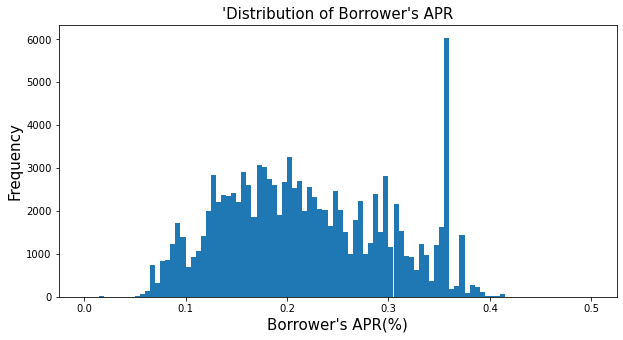

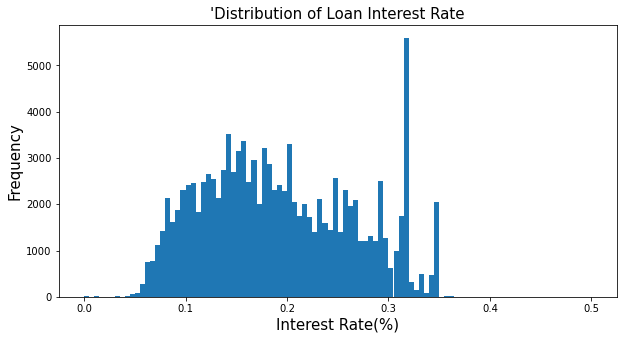

In [30]:
hist('BorrowerAPR', ''''Distribution of Borrower's APR''', '''Borrower's APR(%)''', 
     bins = np.arange(df['BorrowerRate'].min(),df['BorrowerRate'].max()+0.005,0.005))

hist('BorrowerRate', ''''Distribution of Loan Interest Rate''', '''Interest Rate(%)''', 
     bins = np.arange(df['BorrowerRate'].min(),df['BorrowerRate'].max()+0.005,0.005))

> From the distributions, it was obvious there were outliers(low value outliers and high value outliers) in both variables. These would be further looked into to know how to deal with those ouliers.)

In [31]:
#check values where APR is less than 0.05 or intereest rate less than 0.04
low_val_outliers = (df['BorrowerAPR'] < 0.05) | (df['BorrowerRate'] < 0.04)
df.loc[low_val_outliers]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,EmploymentStatusDuration,ListingCategory,BankcardUtilization,InvestmentFromFriendsAmount,LoanOriginationQuarter,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,Investors,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,StatedMonthlyIncome
1484,36,Completed,0.01657,0.0100,False,NaN,Not Available,NaN,0.00,Q4,7.0,NaN,31.0,1,5000,0.20000,Not displayed,True,141.04,4576.000000
1839,36,Completed,0.04583,0.0425,False,80.0,Business,0.00,26.90,Q1,0.0,0.0,0.0,23,1000,0.05000,$50k-74k,True,29.64,4583.333333
5823,36,Completed,0.02811,0.0115,False,0.0,Not Available,0.85,0.00,Q2,3.0,5724.0,2.0,1,1000,0.12000,$25k-49k,True,28.27,2426.666667
9517,12,Completed,0.04935,0.0400,True,48.0,Other,0.04,0.00,Q4,0.0,0.0,0.0,20,1000,0.04000,$50k-74k,True,85.15,4166.666667
15993,36,Chargedoff,0.01823,0.0100,False,32.0,Debt Consolidation,0.47,1941.55,Q4,0.0,0.0,0.0,1,2000,0.25000,$1-24k,True,56.42,1833.333333
20990,36,Completed,0.03664,0.0300,True,NaN,Not Available,NaN,0.00,Q3,6.0,NaN,10.0,1,3200,0.03000,Not displayed,True,93.06,5833.333333
20993,36,Completed,0.03664,0.0300,True,56.0,Not Available,0.79,0.00,Q2,1.0,475.0,0.0,1,3000,0.23000,$25k-49k,True,87.24,3750.000000
26650,36,Defaulted,0.01647,0.0099,True,NaN,Not Available,NaN,0.00,Q4,26.0,NaN,18.0,1,4500,0.18000,Not displayed,True,126.92,2500.000000
29859,36,Completed,0.01650,0.0000,True,NaN,Not Available,NaN,0.00,Q3,0.0,NaN,0.0,13,1000,0.07000,Not displayed,True,27.78,8583.333333
32320,36,Completed,0.05022,0.0300,False,33.0,Student Use,0.84,0.00,Q3,0.0,0.0,11.0,1,1400,NaN,$1-24k,False,40.71,1000.000000


There are 43 loans with extremely low values. Though these are outliers, they could not just be dropped as they contain vital information about the data. Dropping these rows might causes biases in the analyses, axes limits would be used instead.
Yet, some values in the `BorrowerRate` column had zero as value. This should not be as each loan is expected to have an interest rate. These rows would hence be dropped.

In [32]:
#drop the rows where interest rate is zero
df.drop(index = (df[df['BorrowerRate']== 0].index), axis = 0, inplace = True)

In [33]:
#check if rows have been dropped
df[df['BorrowerRate'] == 0] | df[df['BorrowerAPR'] == 0]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,EmploymentStatusDuration,ListingCategory,BankcardUtilization,InvestmentFromFriendsAmount,LoanOriginationQuarter,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,Investors,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,StatedMonthlyIncome


In [34]:
#check values where APR is greater than 0.45 or intereest rate greater than 0.36
high_val_outliers = (df['BorrowerAPR'] > 0.45) | (df['BorrowerRate'] > 0.36)
df.loc[high_val_outliers]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,EmploymentStatusDuration,ListingCategory,BankcardUtilization,InvestmentFromFriendsAmount,LoanOriginationQuarter,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,Investors,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,StatedMonthlyIncome
14160,36,Chargedoff,0.40831,0.4000,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,41,5000,0.18002,Not displayed,True,240.55,2208.333333
18326,36,Defaulted,0.45857,0.4500,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,21,3000,0.10252,Not displayed,True,153.21,10000.000000
22195,36,Chargedoff,0.46201,0.4500,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,21,1789,0.35430,Not displayed,True,91.37,2916.666667
36018,36,Completed,0.51229,0.4975,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,9,1500,0.02852,Not displayed,True,80.94,2838.000000
56761,36,Defaulted,0.50633,0.4975,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,21,3000,0.03909,Not displayed,False,161.88,0.000000
70428,36,Completed,0.38318,0.3750,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,35,5000,0.17998,Not displayed,True,8.42,8341.666667
82043,36,Defaulted,0.48873,0.4800,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,20,3000,0.10021,Not displayed,True,158.66,1583.333333
95035,36,Defaulted,0.40831,0.4000,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,40,5000,0.10773,Not displayed,True,240.55,5416.666667
103973,36,Defaulted,0.45857,0.4500,False,NaN,Not Available,NaN,0.0,Q1,NaN,NaN,NaN,22,2800,0.19413,Not displayed,True,143.00,3750.000000


There seemed to be nothing serious going on in the 9 rows with extremely high outliers. Dropping these rows would be better to get rid of biases in the analyses

In [35]:
#drop the high values outliers
df.drop(index = (df.loc[high_val_outliers].index), axis = 0, inplace = True)

In [36]:
#check if rows has been dropped
df.loc[high_val_outliers]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,EmploymentStatusDuration,ListingCategory,BankcardUtilization,InvestmentFromFriendsAmount,LoanOriginationQuarter,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,Investors,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,StatedMonthlyIncome


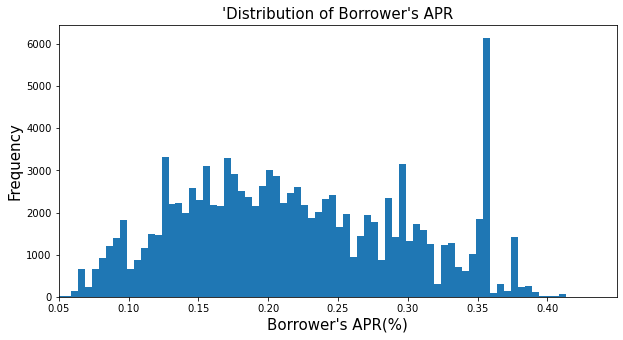

In [37]:
#Re-plotting the distributions
hist('BorrowerAPR', ''''Distribution of Borrower's APR''', '''Borrower's APR(%)''',
     bins = np.arange(df['BorrowerAPR'].min(),df['BorrowerAPR'].max()+0.005,0.005))
#use xlim to crop out the outliers
plt.xlim(0.05);

> The BorrowerAPR variable is also unimodal as with loan amount. Its mode was at about 35.6e-3% APR. This made it seem like the annual percentage rate is not positively(or not all) correlated with loan amount as the amount with the highest frequency fell on the low side of the loan amount distribution. The correlation would be investigated later.

Next, the distribution of the interest rate variable would be explored;

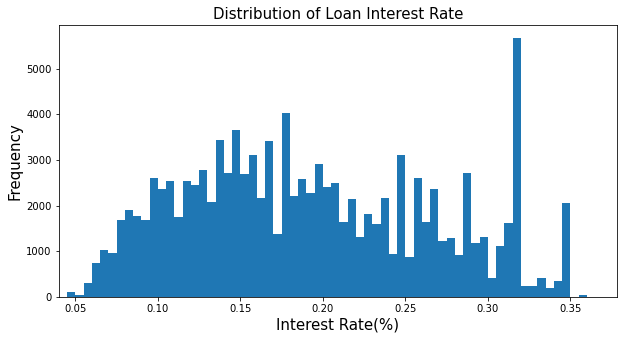

In [38]:
hist('BorrowerRate', 'Distribution of Loan Interest Rate', 'Interest Rate(%)',
     bins = np.arange(df['BorrowerRate'].min(),df['BorrowerRate'].max()+0.005,0.005))
#remove extreme outliers
plt.xlim(0.04);

> The distribution of the interest rate and annual percentage rate are almost the same. The could mean a strong correlation existed between the two variables.

The distributions of loans with delinquencies would be explored next, starting with the debt-to-income ratios;

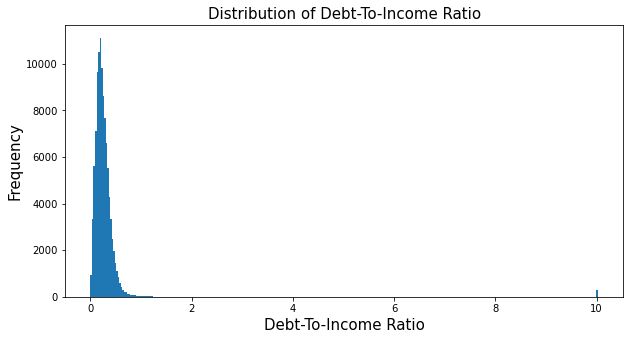

In [39]:
hist('DebtToIncomeRatio','Distribution of Debt-To-Income Ratio','Debt-To-Income Ratio',
    bins = np.arange(df['DebtToIncomeRatio'].min(),df['DebtToIncomeRatio'].max()+0.03,0.03))

> Most customers were without debts, and just a few had about 10 debt ratio leaving a huge gap between the values. to be sure this is essentially right, a transformation would be applied to the variable. Since the data is right skewed, a log transformation would have been better, but since there were values with zeros, a symlog transformation would be applied instead.

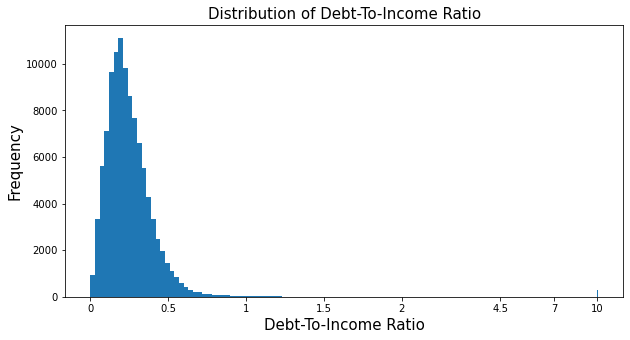

In [40]:
hist('DebtToIncomeRatio','Distribution of Debt-To-Income Ratio','Debt-To-Income Ratio',
    bins =np.arange(0,10+0.03,0.03))
#set symlog transformation
plt.xscale('symlog')
plt.xticks([0,0.5,1,1.5,2,4.5,7,10],[0,0.5,1,1.5,2,4.5,7,10]);

> The transformation made it obvious that most of the data actually laid between 0 and 1.5 with just a few points at 10, signifying ratios greater than 1000% (as seen in the [feature documentation](https://www.google.com/urlq=https://docs.google.com/spreadsheet/ccckey%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554486256024000)), hence the reason for the ouliers.

Next, the other delinquencies variables would be explored.

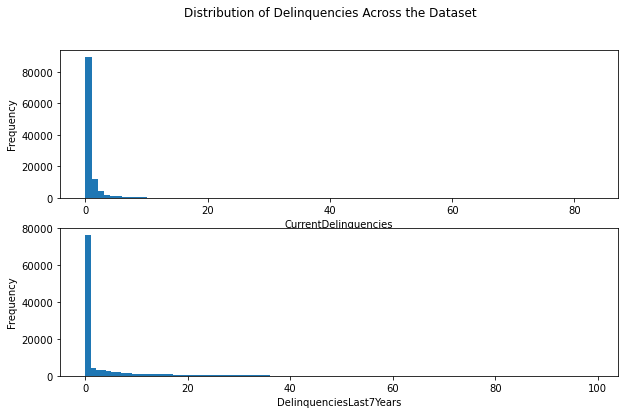

In [41]:
fig, ax = plt.subplots(2, figsize = (10,6))
variables = ['CurrentDelinquencies','DelinquenciesLast7Years']
for i in range(len(variables)):
    col = variables[i]
    ax[i].hist(data = df, x = col, bins = np.arange(df[col].min(),df[col].max()+1,1))
    ax[i].set_xlabel('{}'.format(col), fontsize = 10)
    ax[i].set_ylabel('Frequency')
    plt.suptitle('Distribution of Delinquencies Across the Dataset')

> The two variables followed a left skewed, long tailed distribution, hence scale transformation would be applied to them inorder to be able to view the hidden data. A log scale transformation would not be suitable for the variables, as they contained many zero values as seen from the visualizations above. Instead, a symlog transformation would be applied.

In [42]:
def symlog_trans(col):
    """Transformation Helper Function
    Takes the column name and returns the transformed plot"""
    plt.figure(figsize= (10,4))
    plt.hist(data = df, x = col, bins = np.arange(0,100+0.1,0.1))
    plt.xscale('symlog')
    plt.xticks([0,0.5,1,1.5,2,4,10,30,100],[0,0.5,1,1.5,2,4,10,30,100])
    plt.xlabel('{}'.format(col), fontsize = 10)
    plt.ylabel('Frequency')

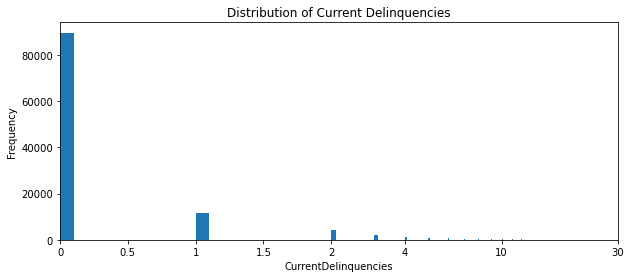

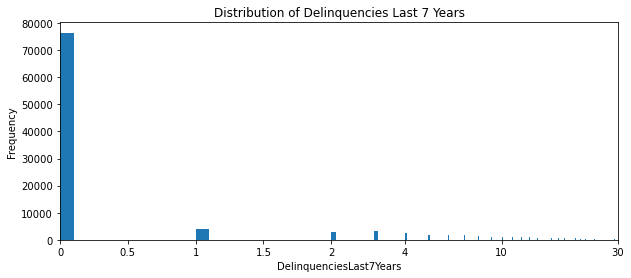

In [43]:
symlog_trans('CurrentDelinquencies')
#set axis limit to crop out outliers
plt.xlim(0,30)
plt.title('Distribution of Current Delinquencies')

symlog_trans('DelinquenciesLast7Years')
#set axis limit to crop out outliers
plt.xlim(0,30)
plt.title('Distribution of Delinquencies Last 7 Years');

> From the visualizations, and as seen before, the current delinquencies and delinquencies since last seven years variables were both unimodal with most loans having delinquencies of zero followed by one. Though the distributions almost looked the same, there seemed to be more loans with over seven years delinquencies than number of loans with current delinquencies, or loans with both.

It would also be worthy to check how loans with investors are distributed.

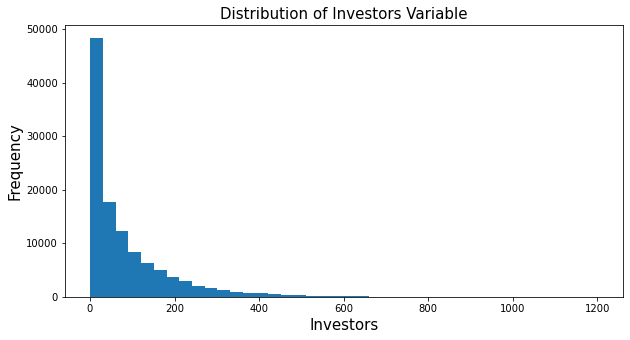

In [44]:
hist('Investors', 'Distribution of Investors Variable', 'Investors',
     bins = np.arange(df['Investors'].min(),df['Investors'].max()+30,30))

> The investors variable is unimodal and skewed to the right with its highest peak at zero, signifying most loans were without investors. The required more deep insights. Hence the number of loans with zero investors would be checked.

In [45]:
#check loans with zero investor
df[df['Investors']==0]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,EmploymentStatusDuration,ListingCategory,BankcardUtilization,InvestmentFromFriendsAmount,LoanOriginationQuarter,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,Investors,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,StatedMonthlyIncome


> It appeared there were actually no loans with no investors. The issue seemed to be with the ticks used by Matplotlib, hence the ticks would be manually set.

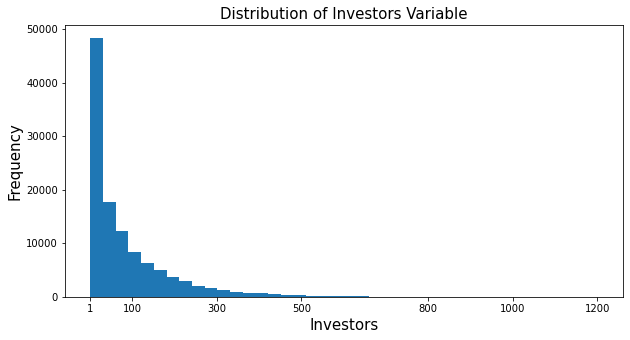

In [46]:
hist('Investors', 'Distribution of Investors Variable', 'Investors',
     bins = np.arange(df['Investors'].min(),df['Investors'].max()+30,30))
#set ticks and tick labels
plt.xticks([1,100,300,500,800,1000,1200],[1,100,300,500,800,1000,1200]);

> With the ticks set to start at 1, it was now clearly seen that most loans had just one investor, followed by a high frequency at about 50 investors.

Next, the distribution of amount invested by friends, stated monthly income and monthly loan payment variables would be explored.

In [47]:
def violinplot(col, title, xlabel):
    """function takes three arguments and return a plotted violinplot"""
    plt.figure(figsize = (10,4))
    sb.violinplot(data = df, x = col)
    plt.title(title)
    plt.xlabel(xlabel);

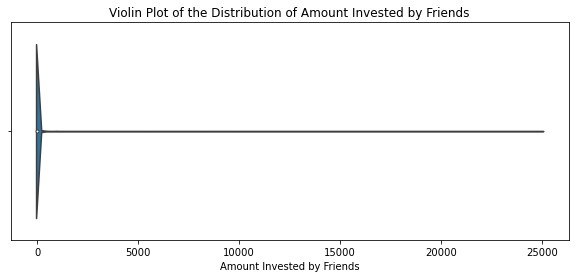

In [48]:
#plot the amount invested by friends variable
violinplot('InvestmentFromFriendsAmount','Violin Plot of the Distribution of Amount Invested by Friends',
           'Amount Invested by Friends')

> It seemed most loans do not have any amount invested by friends. The data also had extreme outliers.

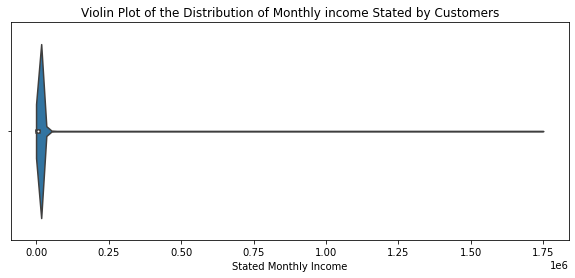

In [49]:
#plot the stated monthly income distribution
violinplot('StatedMonthlyIncome','Violin Plot of the Distribution of Monthly income Stated by Customers',
           'Stated Monthly Income')

> The plot above did not seem right as the used ticks seemed out of place and not nicely set. A manual set of ticks would be used instead.

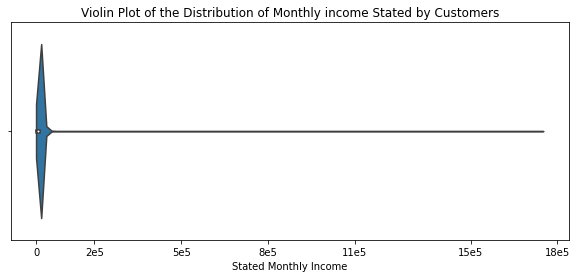

In [50]:
violinplot('StatedMonthlyIncome','Violin Plot of the Distribution of Monthly income Stated by Customers',
           'Stated Monthly Income')
#set the ticks to be used
plt.xticks([0,2e5,5e5,8e5,11e5, 15e5,18e5],[0,'2e5','5e5','8e5','11e5','15e5','18e5']);

> There seemed to be more loans with \$0 stated monthly income. The distribution also appeared to have extreme outliers.

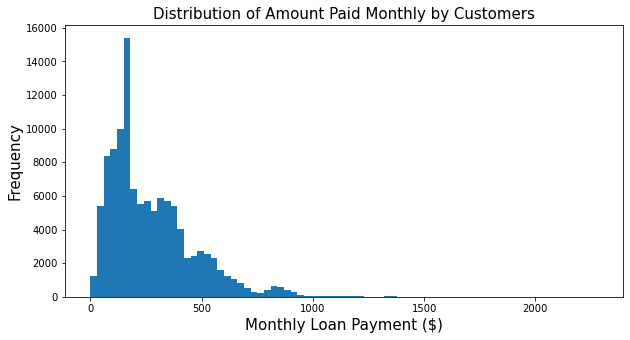

In [51]:
#plot the distribution of monthly loan payment
hist('MonthlyLoanPayment','Distribution of Amount Paid Monthly by Customers','Monthly Loan Payment ($)',
    bins = np.arange(df['MonthlyLoanPayment'].min(),df['MonthlyLoanPayment'].max()+30,30))

> The distribution appeared to be right skewed and unimodal with its peak at about \$200. Strangely though, there were \\$0 amount been paid monthly which should not be. This should be checked out.

In [52]:
#check where monthly payment equaled zero
df[df['MonthlyLoanPayment']==0]

,Term,LoanStatus,BorrowerAPR,BorrowerRate,IsBorrowerHomeowner,EmploymentStatusDuration,ListingCategory,BankcardUtilization,InvestmentFromFriendsAmount,LoanOriginationQuarter,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,Investors,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,StatedMonthlyIncome
27,36,Completed,0.11296,0.0920,True,10.0,Debt Consolidation,0.09,0.0,Q2,0.0,0.0,0.0,121,4000,0.26,$75k-99k,True,0.0,6666.666667
66,36,Completed,0.16802,0.1500,False,1.0,Not Available,0.07,0.0,Q2,1.0,111.0,12.0,1,1000,0.20,Not employed,True,0.0,860.000000
113,36,Completed,0.30564,0.2900,False,37.0,Not Available,0.00,0.0,Q1,13.0,6059.0,25.0,39,3000,0.04,$50k-74k,True,0.0,4166.666667
198,36,Completed,0.29265,0.2575,False,3.0,Other,0.75,0.0,Q3,0.0,0.0,0.0,53,3000,0.12,above 100k,True,0.0,10000.000000
310,36,Completed,0.12724,0.1175,False,NaN,Not Available,NaN,0.0,Q3,1.0,NaN,5.0,27,1800,0.16,Not displayed,True,0.0,3750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113588,36,Completed,0.19957,0.1850,False,2.0,Not Available,0.24,0.0,Q2,2.0,1095.0,51.0,63,1258,0.50,$1-24k,True,0.0,800.000000
113614,36,Defaulted,0.37453,0.3500,True,2.0,Debt Consolidation,1.36,0.0,Q1,6.0,2051.0,4.0,5,1500,0.21,$25k-49k,True,0.0,4000.000000
113717,36,Completed,0.12663,0.1055,True,2.0,Debt Consolidation,0.24,0.0,Q4,1.0,0.0,3.0,207,4900,0.18,$50k-74k,True,0.0,5072.833333
113840,36,Defaulted,0.22674,0.2000,False,21.0,Other,0.19,0.0,Q4,0.0,0.0,7.0,116,1400,0.19,$1-24k,True,0.0,2000.000000


In [53]:
df[df['MonthlyLoanPayment']==0]['LoanStatus'].unique()

array(['Completed', 'Defaulted', 'FinalPaymentInProgress'], dtype=object)

> 933 rows had monthly loan payment equalled zero, and seemed these were only so for loans not in progress, or about to be completed loans. Hence, they would be ignored and not dropped.

Lastly, the bank card utilization variable would be explored.

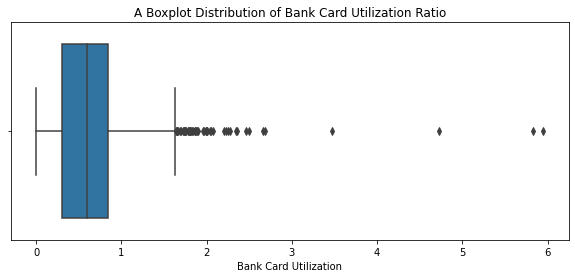

In [54]:
#plot a boxplot distribution of the bank card utilization variable
plt.figure(figsize = (10,4))
sb.boxplot(data = df, x = 'BankcardUtilization')
plt.title('A Boxplot Distribution of Bank Card Utilization Ratio')
plt.xlabel('Bank Card Utilization');

> Most of the ratios fell between zero and one. The median of the variable appeared to be at 0.6 meaning fifty percent of the values fell below 0.6 and the other fifty percent fell above 0.6. The max ratio was at 1.8 while there were many outliers.

Exploring the categorical non-numerical variables of interest, the loan status variable would be explored first.

In [55]:
def barchart(col_name, title, xlabel):
    """Quick function that takes arguments and returns a plotted barchart"""
    plt.figure(figsize = (18,8))
    ax = sb.countplot(data = df, x = col_name, color = 'blue', order = df[col_name].value_counts().index)
    #annotate each value on each bar
    ax.bar_label(ax.containers[0], fontsize = 13)
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 18)
    plt.ylabel('Counts', fontsize = 18)
    plt.xticks(rotation = 90, fontsize = 15)
    plt.yticks(fontsize = 14);

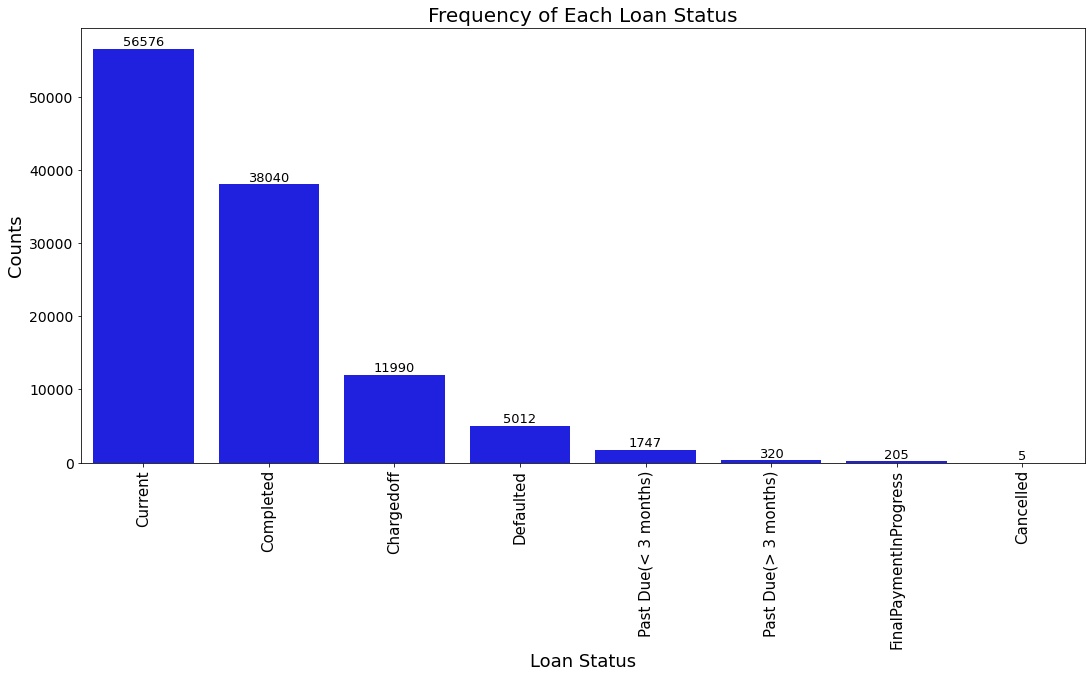

In [56]:
#plot a barchart distribution of the loan status variable
barchart('LoanStatus','Frequency of Each Loan Status', 'Loan Status')

> Neglecting the `Current` value as it meant loan was still in progress, most loans were completely paid off, while about 21% were charged off. The frequency of the past due loans less than 3months was about 5x more than those above 3months past due with cancelled loans having the lowest frequency.

The frequency of the listing category variable would be explored next.

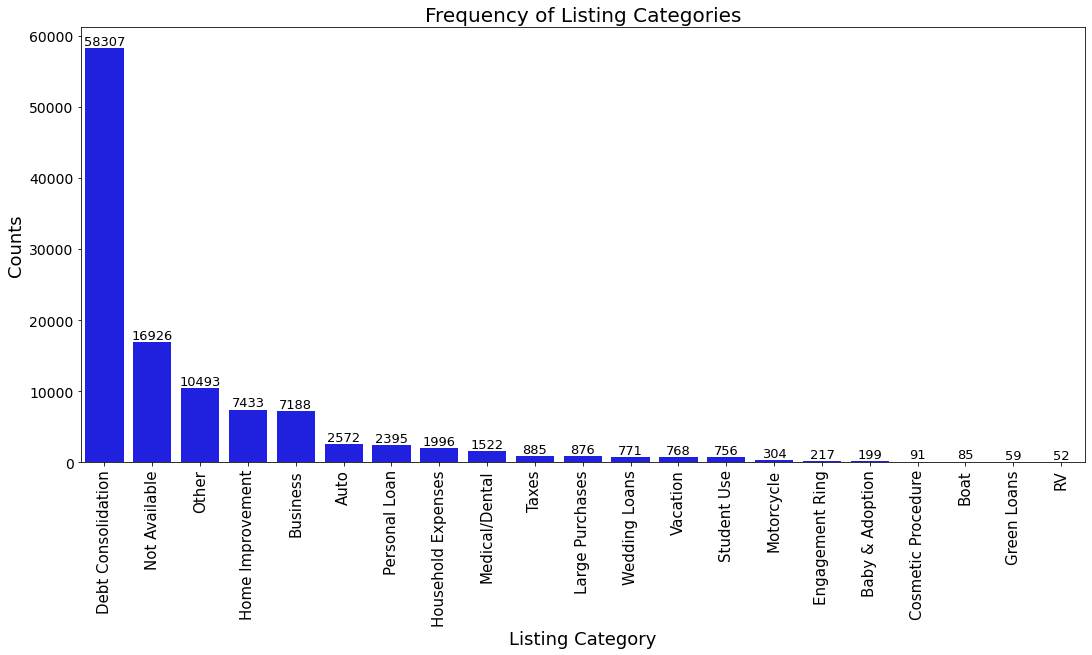

In [57]:
#plot a barchart distribution of the listing category
barchart('ListingCategory', 'Frequency of Listing Categories', 'Listing Category')

> A higher percentage of customers(about 51%) needed the loan for settling off debts, while about 6% needed the loan for home improvement and business purposes.
It would be worthy to know if the listing category affects loan payment, especially those used for non-profit purposes.

Next, the distribution of income ranges, if borrower is home owner or not and loan origination quarter would be explored

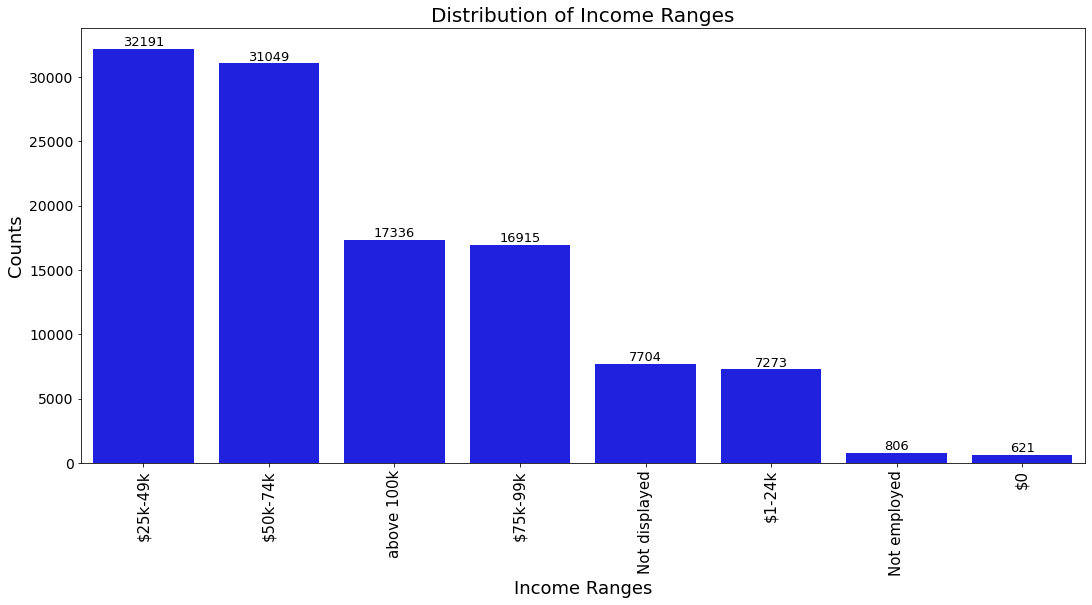

In [58]:
#plot the distribution of income ranges
barchart('IncomeRange', 'Distribution of Income Ranges','Income Ranges')

> On the average, most customers who took loans had about \$37 income, followed those with \\$62 average income, while about 0.5% had no income.

In [59]:
def piechart(col, **kwargs):
    """Quick hack for plotting a pie chart"""
    plt.figure(figsize = (6,6))
    plt.pie(df[col].value_counts(),startangle = 90, autopct = '%1.2f%%', labels = df[col].value_counts().index,
            textprops = {'fontsize': 12}, **kwargs);

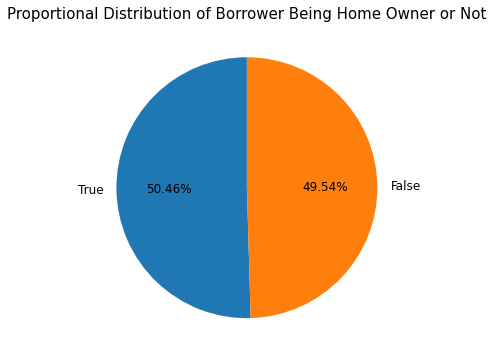

In [60]:
#plot the distribution of if borrower is home owner or not
piechart('IsBorrowerHomeowner')
plt.title('Proportional Distribution of Borrower Being Home Owner or Not', fontsize = 15);

> There was almost no difference between the percentages of borrowers being home owners or not, though those who were home owners were about 1% more than those who were not home owners.

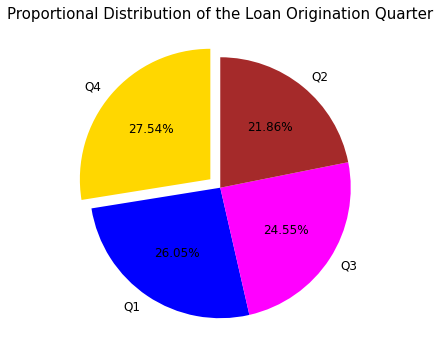

In [61]:
#explore the distribution of loan origination quarter variable
piechart('LoanOriginationQuarter',colors = ['gold','blue','magenta','brown'],explode = [0.1,0.0,0.0,0.0])
plt.title('Proportional Distribution of the Loan Origination Quarter', fontsize = 15);

> Most loans were gotten during the last quarter of the year, followed by the first quarter and least gotten at the second quarter.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan amount variable using the default ten bin sizes of Matplotlib, the distribution followed a right skewed distribution. To view the data in a more deep sense, a small bin sizes were set which showed the data was unimodal and skewed on both sides.
> The BorrowerAPR and BorrowerRate variables both contained outliers, all of which were treated accordingly.
> The delinquencies variables had long tailed distributions and since both variables contained zeros, symlog transformations were performed on them and axes limits used to crop out the extreme outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The interest rate and the annual percentage rate variables were found the contain outliers, both low and high values outliers. The high value outliers (nine rows) were dropped, the rows with low value outliers were managed as dropping them might lead to biases in analyses. The zero values found in the interest rate variable were also dropped.

## Bivariate Exploration

> In this section, relationships between pairs of variables in the data would be investigated.
> Exploration of the the correlation between the numerical variables would first be carried out, followed by the exploration of the categorical variables.

Was their any correlation between the numeric variables in the dataset?

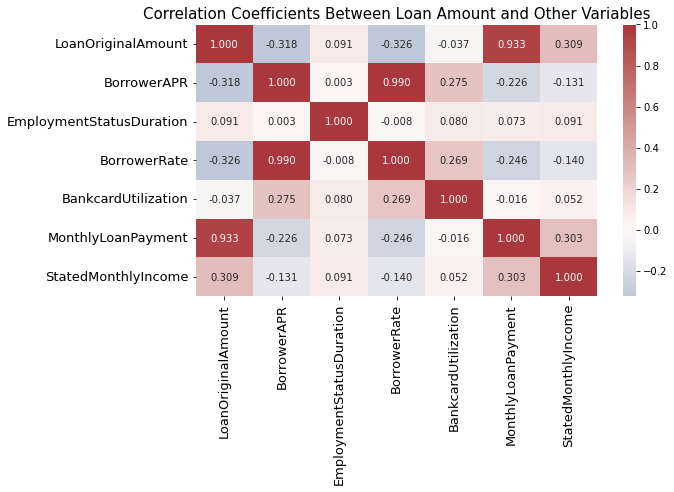

In [62]:
#check for correlation between some variables of interest where the income of customer had been verified
verified_income = df[df['IncomeVerifiable'] == True]
nums = ['LoanOriginalAmount','BorrowerAPR','EmploymentStatusDuration','BorrowerRate',
        'BankcardUtilization', 'MonthlyLoanPayment', 'StatedMonthlyIncome']

plt.figure(figsize = (9,5))
sb.heatmap(verified_income[nums].corr(), annot = True, fmt = '.3f',cmap = 'vlag', center = 0)
plt.title('Correlation Coefficients Between Loan Amount and Other Variables', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);

> There seemed to be very high correlation between the interest rate and the annual percentage rate as earlier predicted, and also between the loan amount and loan monthly payment. The bank card utilization percentage also seemed slightly correlated with the rates variables; though more correlated with the APR than interest rate.
Aside these, the variables were hardly correlated with one another.

Next, correlation between variables where the customer had some deliquencies would be explored

In [63]:
def pairgrid(data, variable):
    a = sb.PairGrid(data = data, vars = variable)
    a = a.map_diag(plt.hist, bins= 30)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 12)
    a.map_offdiag(plt.scatter);

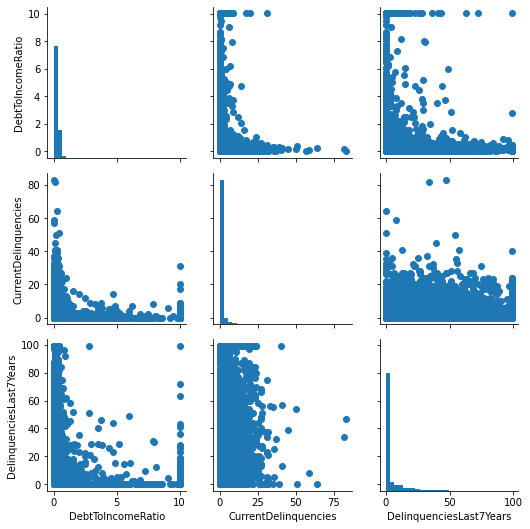

In [64]:
#check where borrower had delinquencies
delinquencies = df[df['CurrentDelinquencies'].notnull()]
variables = ['DebtToIncomeRatio', 'CurrentDelinquencies', 'DelinquenciesLast7Years']
pairgrid(delinquencies, variables)

> There seemed to be no strong correlations between the delinquencies variables.

Next, correlation of loan amount with investment variables would be explored

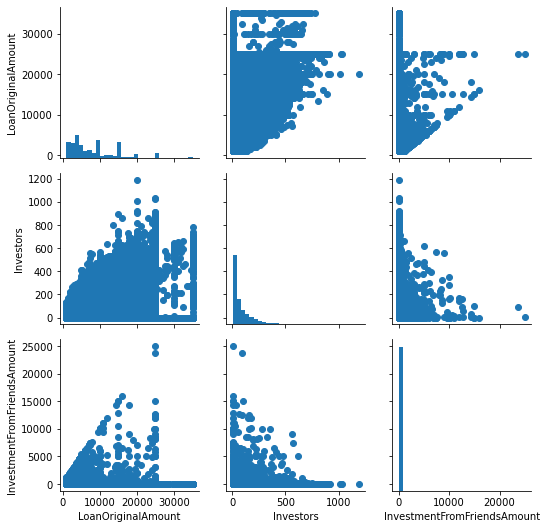

In [65]:
variables = ['LoanOriginalAmount','Investors', 'InvestmentFromFriendsAmount']
pairgrid(df, variables)

> The variables did not seem much correlated, save for the little correlation that existed between the amount invested by friends and loan amount.

The correlation between the loan status and the numerical variables would be viewed next.

In [66]:
def bi_violin(x,y, title):
    """Function takes arguments 
    and returns a plotted bivariate violin plot"""
    #sort the bars according to their medians, since it is a violin plot
    order = df.groupby(x)[y].median().sort_values(ascending = False).index
    #plot the data to be returned
    sb.violinplot(data = df, x = x, y = y, color = sb.color_palette()[0], order = order)
    plt.title(title, fontsize = 15)
    plt.xticks(rotation = 45, fontsize = 12)
    plt.xlabel('Loan Status', fontsize = 12)

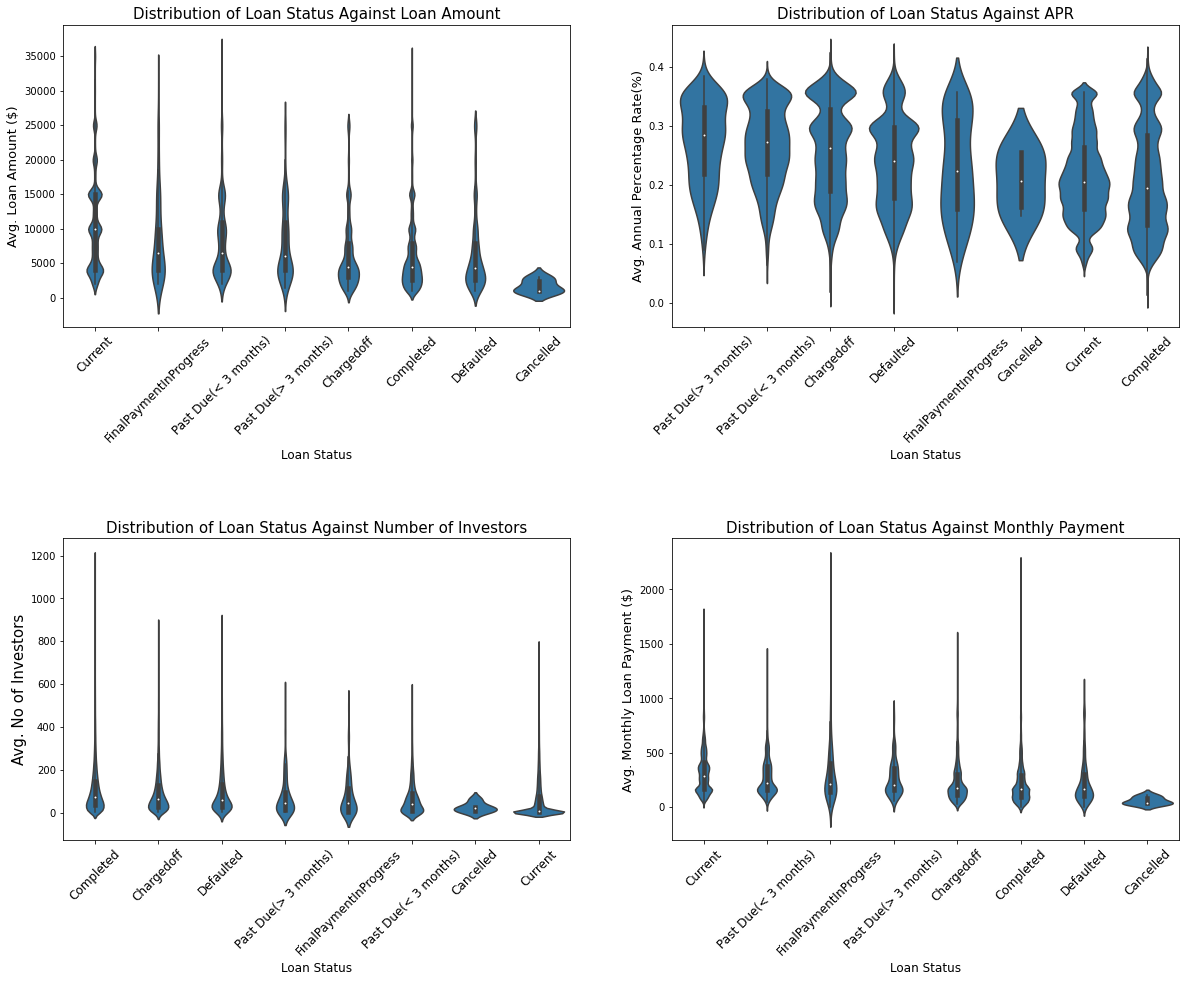

In [67]:
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.7)

plt.subplot(221)
bi_violin('LoanStatus','LoanOriginalAmount','Distribution of Loan Status Against Loan Amount')
plt.ylabel('Avg. Loan Amount ($)', fontsize = 13)

plt.subplot(222)
bi_violin('LoanStatus','BorrowerAPR','Distribution of Loan Status Against APR')
plt.ylabel('Avg. Annual Percentage Rate(%)', fontsize = 13)

plt.subplot(223)
bi_violin('LoanStatus','Investors','Distribution of Loan Status Against Number of Investors')
plt.ylabel('Avg. No of Investors', fontsize = 15)

plt.subplot(224)
bi_violin('LoanStatus','MonthlyLoanPayment','Distribution of Loan Status Against Monthly Payment')
plt.ylabel('Avg. Monthly Loan Payment ($)', fontsize = 13);

> From the loan amount plot above, it was observed that most loans were of low amounts (below \$10k). Loans within average amount were either completely paid off, defaulted or chargedoff, while loans below average were cancelled and loans above average were past due. There seemed to be very little correlation between loan amount as a standalone variable and loan status. This requires more verification which would be carried out later.

> From the APR plot, it was seen that past due and chargedoff loans had higher annual percentage rate compared to completed loans while cancelled loans had the least APR.

> Completed loans had the highest number of investors, followed slightly by chargedoff and past due loans while cancelled loans had the least number of investors. It did seemed like number of investors as a sole variable influenced loan statuses.

> Customers with past due loans had the highest amount of monthly loan payment. This might not directly influence loan status as it could be due to the high amount of loans gotten by these customers. Because, as observed earlier, there seemed to be a strong correlation between loan amount and monthly loan payment.

Using barplots, other numerical variables would be explored against loan status

In [68]:
def barplot(x,y, title):
    """Quick function to plot a bivariate barplot"""
    #set the bar orders
    order = df.groupby(x)[y].mean().sort_values(ascending = False).index
    #plot the data
    a = sb.barplot(data = df, x = x, y = y, color = sb.color_palette()[0], errwidth = 0, order = order)
    #set the bar labels
    a.bar_label(a.containers[0], fmt = '%.1f', fontsize = 12)
    plt.title(title, fontsize = 15)
    plt.xlabel('Loan Status', fontsize = 13)
    plt.xticks(rotation = 90, fontsize = 12)

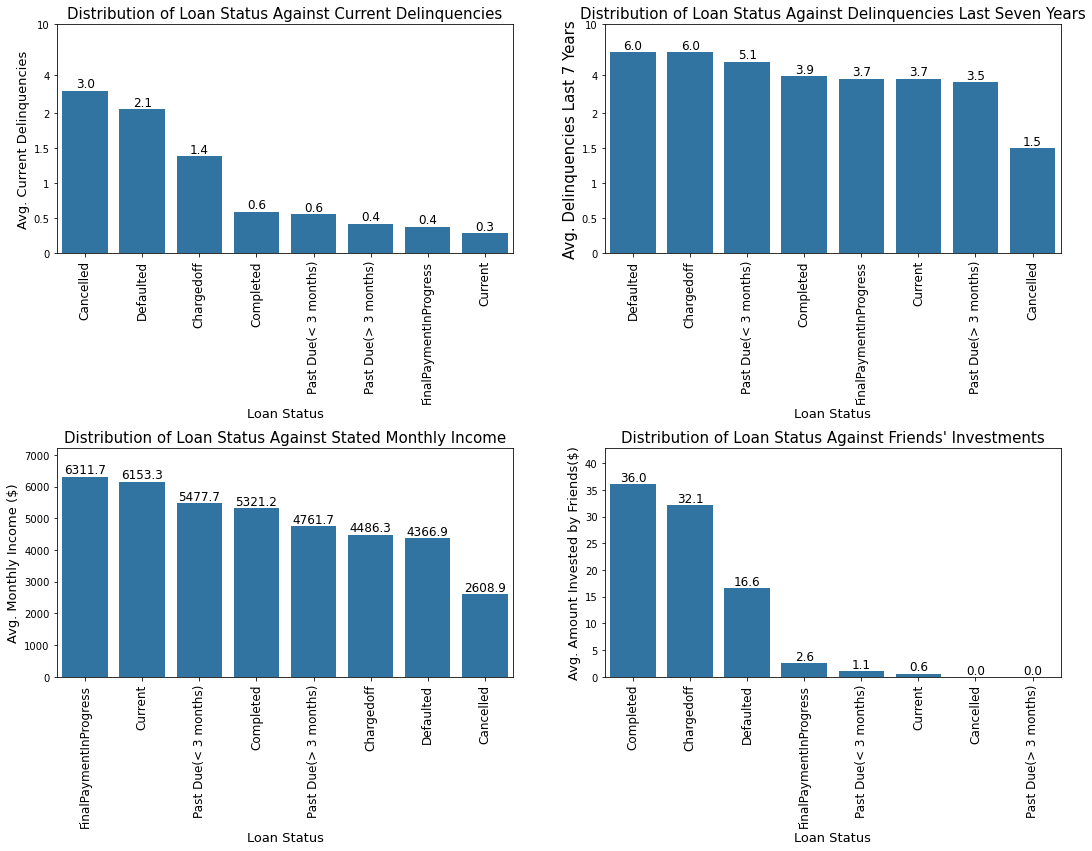

In [69]:
plt.figure(figsize = (18,12))
plt.subplots_adjust(hspace = 0.85)

plt.subplot(221)
barplot('LoanStatus','CurrentDelinquencies','Distribution of Loan Status Against Current Delinquencies')
plt.ylabel('Avg. Current Delinquencies', fontsize = 13)
plt.yscale('symlog')
plt.yticks([0,0.5,1,1.5,2,4,10],[0,0.5,1,1.5,2,4,10])

plt.subplot(222)
barplot('LoanStatus','DelinquenciesLast7Years','Distribution of Loan Status Against Delinquencies Last Seven Years')
plt.ylabel('Avg. Delinquencies Last 7 Years', fontsize = 15)
plt.yscale('symlog')
plt.yticks([0,0.5,1,1.5,2,4,10],[0,0.5,1,1.5,2,4,10])

plt.subplot(223)
barplot('LoanStatus','StatedMonthlyIncome','Distribution of Loan Status Against Stated Monthly Income')
plt.ylabel('Avg. Monthly Income ($)', fontsize = 13)

plt.subplot(224)
barplot('LoanStatus','InvestmentFromFriendsAmount','''Distribution of Loan Status Against Friends' Investments''')
plt.ylabel('Avg. Amount Invested by Friends($)', fontsize = 13);

> Customers who cancelled their loans had the highest current delinquencies (an average of 3), followed by those whose loans were defaulted; with a slight difference of 0.9. Customers who completed their loans and those whose loans were less than three months due had about the same number of current delinquencies, while those about finalizing their payments had the least.

> Defaulted, chargedoff and loans less than three months past due had the highest number of delinquencies last 7 years, followed by completed loans; with a difference of 1 to 2, while cancelled loans had the least.

> Average stated monthly income of those whose loans were past due was slightly higher than those who completed their loans, while stated monthly income of those whose loans were charged off, defaulted or cancelled were the least.

> Customers with up to \$35 average amount invested by friends completed their loan payments, while those with less than \\$35 average amount invested by friends had loans either chargedoff, defaulted or pass due date.

Next, the influence of other categorical variables on loan status would be explored.

In [70]:
def clustered_bar(x, hue, color, title, xlabel, ylabel):
    """Quick clustered bar function"""
    plt.figure(figsize = (15,6))
    order = df[x].value_counts().index
    sb.countplot(data = df, x  = x, hue = hue, order = order, palette = color)
    plt.xticks(rotation = 30)
    plt.title(title, fontsize = 15)
    plt.xlabel(xlabel, fontsize = 14)
    plt.ylabel(ylabel, fontsize = 14)

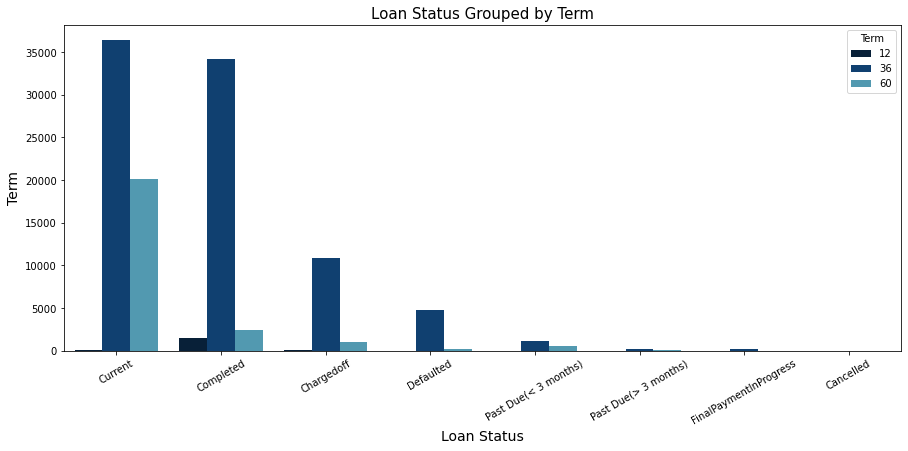

In [71]:
#plot a clustered bar chart of loan status against term
clustered_bar('LoanStatus','Term','ocean','Loan Status Grouped by Term','Loan Status', 'Term')
plt.legend(title = 'Term', loc = 'upper right');

> There seemed to be more samples for term 36 than other terms. Hence, basing insights on this plot might bring out some biases. Therefore, instead of using counts to judge, proportion would be used instead.

In [72]:
def proportion(col1, col2, palette):
    """Function takes column names and returns clustered bar plot;
    where col2 is the column the proportion is being calculated for"""
    #calculate the counts and call the grouped data using any column in the dataset
    counts = df.groupby([col1,col2]).count()['LoanOriginalAmount']
    #calculate the total and call the grouped data using any column of choice
    total = df.groupby(col2).count()['LoanOriginalAmount']
    #calculate the proportion
    prop = counts/total
    #convert the calculated proportion to dataframe so its easy to work with
    prop = prop.reset_index(name = 'proportion')
    #calculate the order the bars should follow
    order = prop.groupby(col1).mean().sort_values('proportion', ascending = False).index
    #plot the data
    plt.figure(figsize = (15,6))
    sb.barplot(data = prop, x = col1, y = 'proportion', hue = col2, order = order, palette = palette)
    plt.legend(title = '{}'.format(col2), loc = 'upper right')

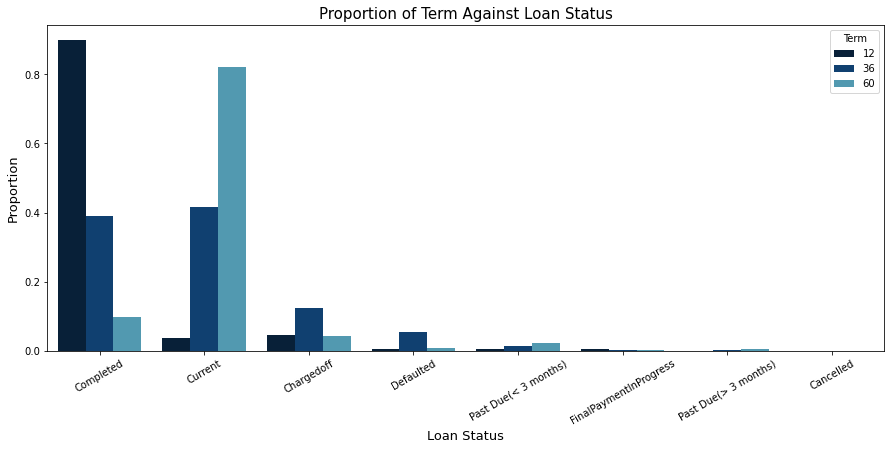

In [73]:
#plot the proportion
proportion('LoanStatus','Term','ocean')
plt.xticks(rotation = 30)
plt.title('Proportion of Term Against Loan Status', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 13)
plt.ylabel('Proportion', fontsize = 13);

> It could now be deduced that most short term loans were completed, followed by mid term loans and long term loans. While of loans charged off, mid term loans were mostly charged off. Loans less than three months past due were mostly long term loans.

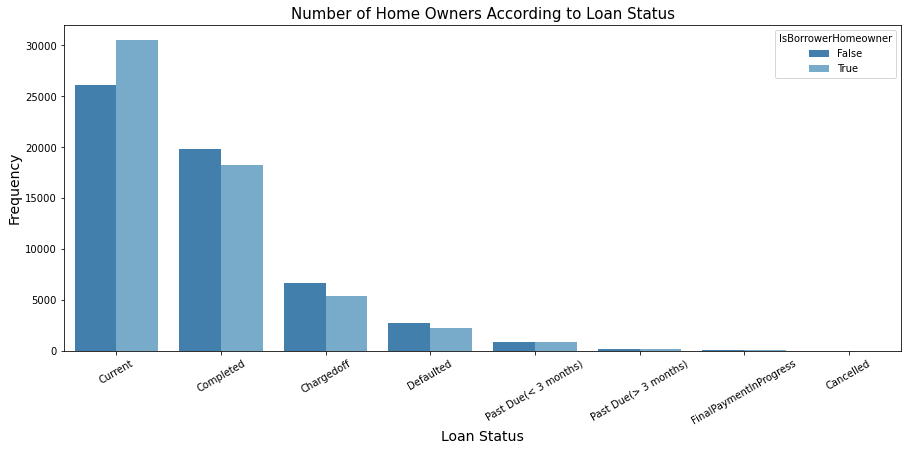

In [74]:
#plot how being home owner influence loan status
clustered_bar('LoanStatus','IsBorrowerHomeowner','tab20c','Number of Home Owners According to Loan Status',
              'Loan Status','Frequency')

> There seemed to be no real correlation between being home owner and completing loans as most loans (completed, chargedoff and defaulted) had higher percentage of borrowers who were not home owners, except the loans past due less than 3 months which had almost the same range.

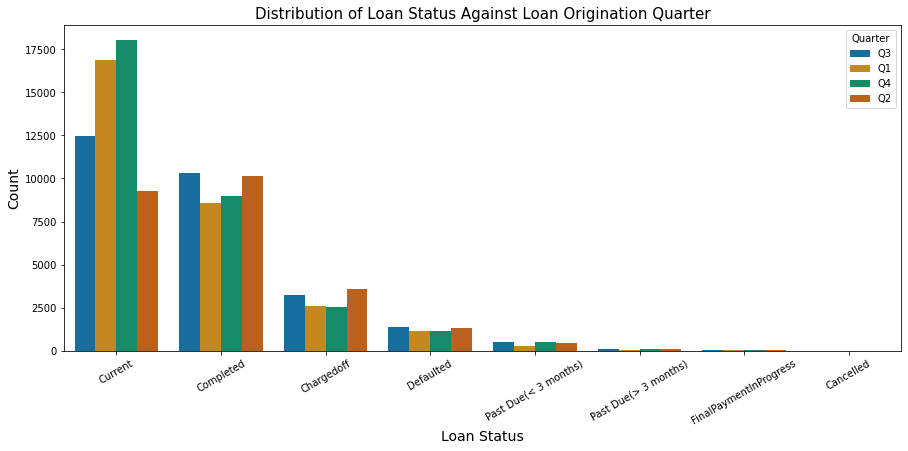

In [75]:
#plot the distribution of loan status against loan quarters
clustered_bar('LoanStatus','LoanOriginationQuarter','colorblind','Distribution of Loan Status Against Loan Origination Quarter',
              'Loan Status','Count')
plt.legend(title = 'Quarter',loc = 'upper right');

> Most loans were completed during the third quarter and least completed during the first quarter. Most chargedoff loans occurred during the second quarter and least charged off during the fourth quarter. Most defaulted loans occurred during the first quarter and least defaulted during the fourth quarter, Likewise, most past due loans occurred during the first quarter.
To prevent biases in judgement, as it seemed there were more samples than the others, it would be good to view the values based on proportions instead.

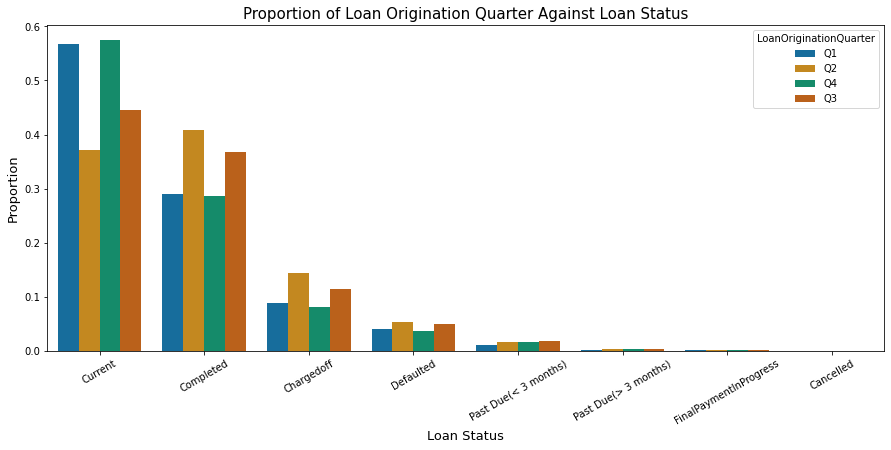

In [76]:
#plot the proportion
proportion('LoanStatus','LoanOriginationQuarter', 'colorblind')
plt.xticks(rotation = 30)
plt.title('Proportion of Loan Origination Quarter Against Loan Status', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 13)
plt.ylabel('Proportion', fontsize = 13);

> Of the loans gotten in the second quarter, a higher percentage were either compeleted, chargedoff or defaulted, followed by the fourth quarter. There seemed to be little or no difference between loans gotten in first and fourth quarters and hence influence loan statuses pretty much the same.
It would be difficult to judge the inflence of quarters on loan statuses using this plot alone, hence would need further exploration.

In [77]:
def facet_bar(x):
    """Quick function to create faceted barplot against loan status variable"""
    a = sb.FacetGrid(data = df, col = x, col_wrap = 4)
    a.map(sb.countplot, 'LoanStatus', 
          order = ['Completed','Defaulted','Chargedoff','Past Due(< 3 months)','Past Due(> 3 months)','Cancelled'])
    a.set_xticklabels(rotation = 90);

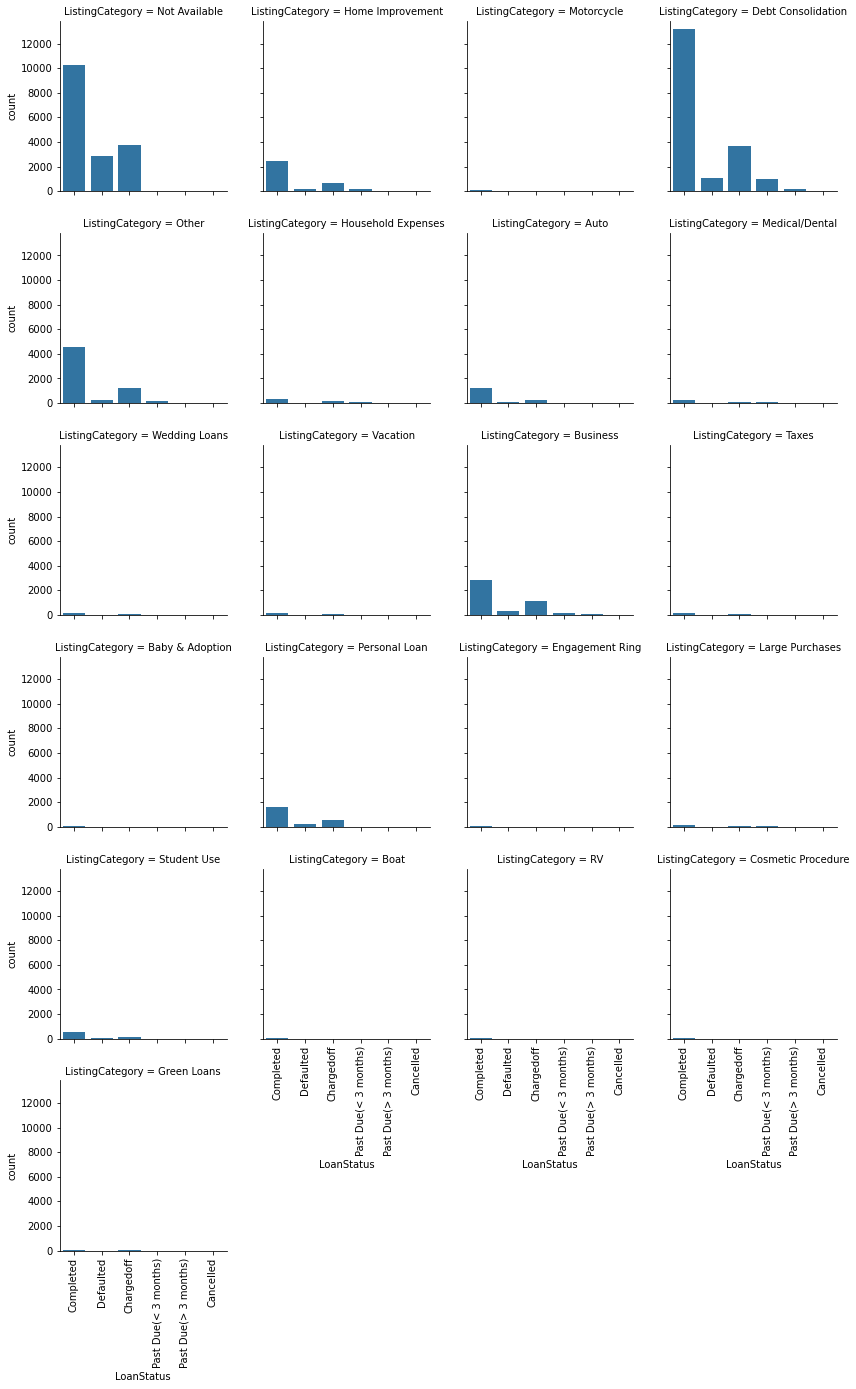

In [78]:
#check the influence of listing category variable on loan status
facet_bar('ListingCategory')

> As earlier seen from the univariate exploration of the distribution of ListingCategory variable, most loans were gotten for debt consolidation and from the facetgrid plots above, of those who got loans to settle debts, a higher percentage of them had their loans chargedoff, this was followed by those whose loans were past due date. Just a few actually paid off their loans completely. In other categories, a higher percentage of them completely paid off their loans, except those who got them for business purposes- where the number of completed loans was almost the same as the number of chargedoff loans, and for personal loans- where most of the loans were chargedoff.

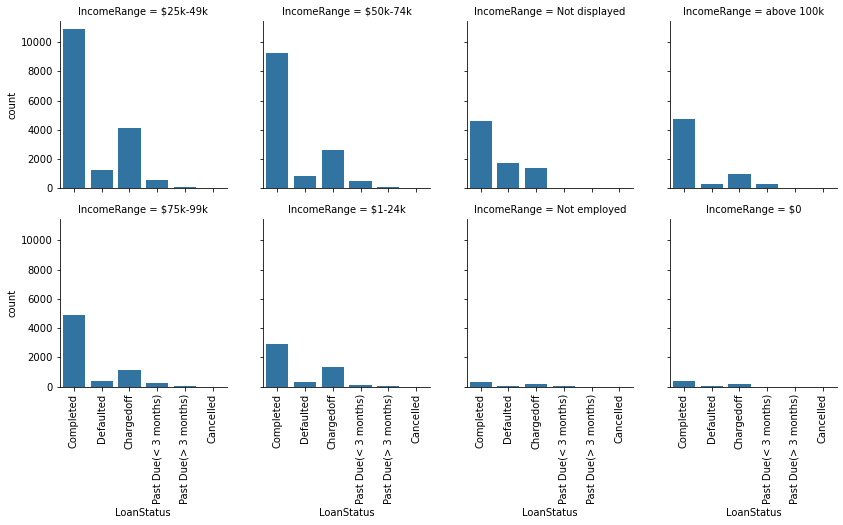

In [79]:
#check the influence of income range variable on loan status
facet_bar('IncomeRange')

> A very high percentage of those whose income was above 100k had their loans completed, with only about 30% or less having their loans chargedoff, defaulted or pass due dates. This is almost so for those with \$75k-99k income range, except for a little increase in the number of chargedoff loans. Of those with no income, about 50% of the loans got chargedoff, and some defaulted.Also, even though a higher number of loans were completed by those within the income range of \\$25k-49k compared to \\$50k-74k, a higher number of loans with the income range ended up being charged off.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The APR and interest rate variables have a very high correlation with themselves though with other variables, their rate of correlation differs as APR is more correlated with bank card utilization than interest rate. Surprisingly though, loan amount was not correlated with any of the rates variables and do at in anyway influence themselves. Although, there seemed to be a high correlation between loan amount and monthly loan repayment, hence the higher the loan amount, the higher the amount to be repayed monthly and vice versa. There also seemed to be a little correlation between amount invested by friends and loan amount. When comparing other variables with the variable of interest- loan status, it was observed that most variables had influences either positively or negatively on loan completion status.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationships were found between most of the variables, except the correlation found between the annual percentage rate variable and bank card utilization variable.

## Multivariate Exploration

> Here, plots of three or more variables would be used to investigate the data further.

How did the loan amount and investment from friends amount influence loan status?

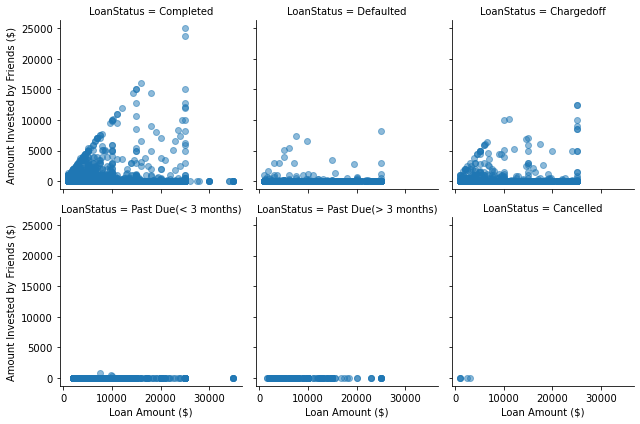

In [80]:
#plot a facetgrid of loan amount and friends investments against loan status
a = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 3,
                col_order = ['Completed','Defaulted','Chargedoff','Past Due(< 3 months)','Past Due(> 3 months)','Cancelled'])
a.map(sb.regplot, 'LoanOriginalAmount', 'InvestmentFromFriendsAmount', fit_reg = False, scatter_kws = {'alpha': 0.5})
a.set_xlabels('Loan Amount ($)')
a.set_ylabels('Amount Invested by Friends ($)');

> The past due and cancelled loans across all loan amounts had zero amount invested by friends. There were little increases in amount invested by friends for defaulted loans, but the highest amount invested by friends was about \$10k, while it was about \\$15k maximum for chargedoff loans. Completed loans had as high as \\$25k amount invested by friends.

Next, exploring how monthly income and loan amount influence loan status; where income of borrower had been verified.

In [81]:
def facetgrid(data, x, y, **kwargs):
    """Quick function to create faceted scatterplot"""
    a = sb.FacetGrid(data = data, col = 'LoanStatus', col_wrap = 3,
                     col_order = ['Completed','Defaulted','Chargedoff','Past Due(< 3 months)','Past Due(> 3 months)','Cancelled'])
    a.map(sb.regplot, x, y, fit_reg = False, x_jitter = 0.3, scatter_kws = {'alpha': 0.5});

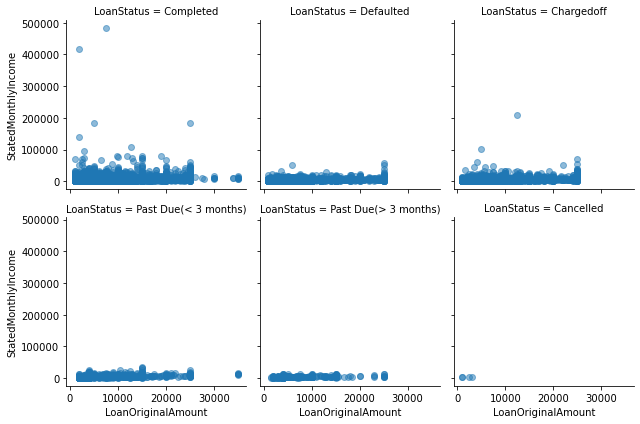

In [82]:
facetgrid(verified_income, 'LoanOriginalAmount','StatedMonthlyIncome')

> Where borrower's income had been verified, most of those who completed the loans earned between \\$0 to \\$10k, while a few earned as much as \\$50k. None of the borrowers whose loans were past due, defaulted or cancelled earned above \$0, while a very few of those with chargedoff loans earned up to \\$20k monthly.

How did loan amount and quarters influences loan status?

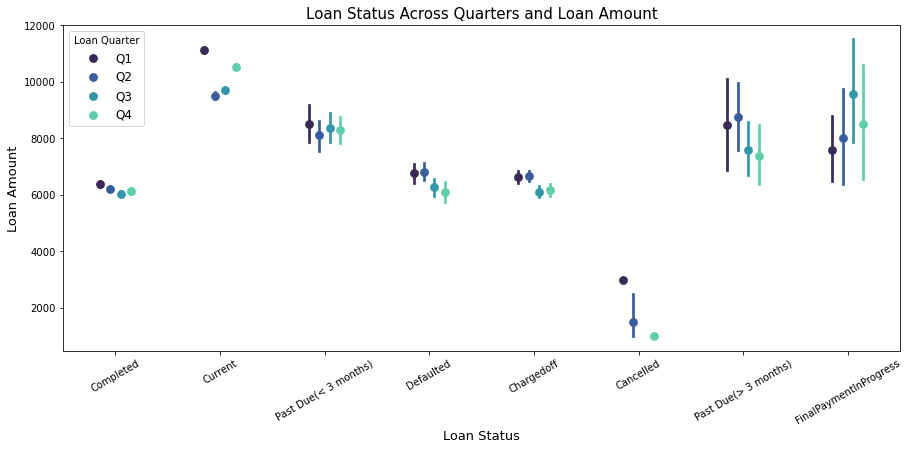

In [83]:
#plot the exploration of loan amount and quarter against loan amount
plt.figure(figsize = (15,6))
sb.pointplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue ='LoanOriginationQuarter',
             hue_order = ['Q1','Q2','Q3','Q4'], linestyles = '', palette = 'mako', dodge = 0.3)
plt.xticks(rotation = 30)
plt.legend(fontsize = 12, title = 'Loan Quarter', loc = 'upper left')
plt.title('Loan Status Across Quarters and Loan Amount', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 13)
plt.ylabel('Loan Amount', fontsize = 13);

> Loans usually gotten in the first quarter seemed to be of higher amounts than other quarters, except for loans greater than three months past due. It did not seem like quarters in much ways affect loan status as there seemed to be no differences between loans gotten in the four quarters that were completed, and those that were chargedoff even though they had almost the same average amount.

How did varying income ranges and loan amounts influence loan status?

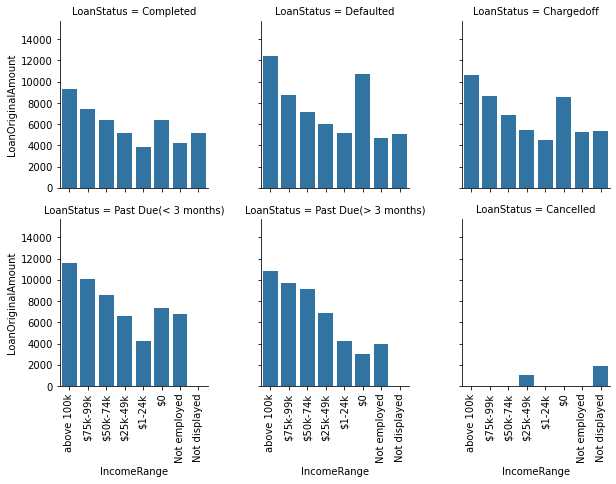

In [84]:
a = sb.FacetGrid(data = df, col = 'LoanStatus', col_wrap = 3,
                col_order = ['Completed','Defaulted','Chargedoff','Past Due(< 3 months)','Past Due(> 3 months)','Cancelled'])
a.map(sb.barplot, 'IncomeRange', 'LoanOriginalAmount',  errwidth = 0,
      order = ['above 100k', '$75k-99k', '$50k-74k', '$25k-49k',  '$1-24k', '$0', 'Not employed', 'Not displayed'])
a.set_xticklabels(rotation = 90);

> Borrowers whose salaries were above 100k who took loans below \$10k completed their loans, those who took about \\$11k had their loans chargedoff, those who took about \\$12k pass their payments due dates while those who took above \\$12k got their loans defaulted. Likewise, borrowers who earned between \\$75k-99k who took loans below \\$8k completed thier loans, while others who took loans above \\$8k did not complete their loans. Similarly, other borrowers who took an average of \\$5k loans tend to complete their loans compared to those who borrowed higher than that amount.

How did loan amount and loan terms influence loan status?

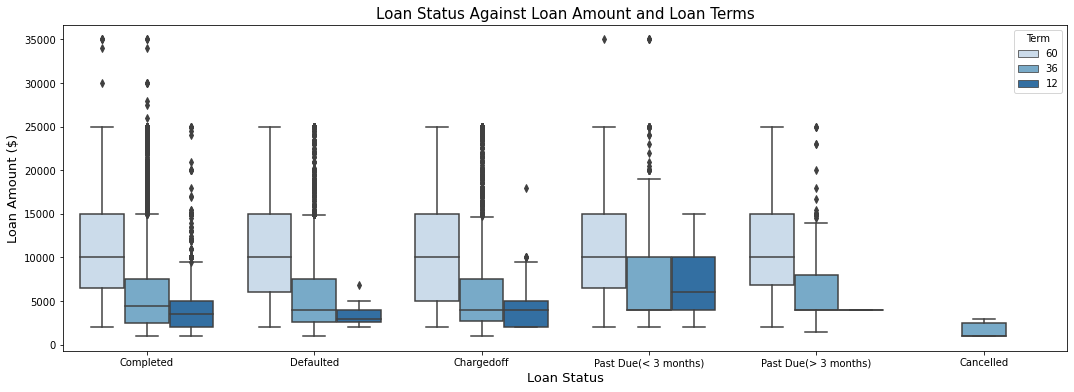

In [85]:
plt.figure(figsize = (18,6))
sb.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'Term',  hue_order = [60,36,12], palette = 'Blues',
           order =  ['Completed','Defaulted','Chargedoff','Past Due(< 3 months)','Past Due(> 3 months)','Cancelled'])
plt.title('Loan Status Against Loan Amount and Loan Terms', fontsize = 15)
plt.xlabel('Loan Status', fontsize = 13)
plt.ylabel('Loan Amount ($)', fontsize = 13);

> From the visualization above, it could be deduced that the higher the loan amount, the higher the term and the higher the number of loans gotten. The long termed loans seemed not to have much differences as on the average of \\$10k, the ranges in completion, charging-off and defaultion did not differ much. This is almost so for mid-termed loans except for a slight difference in past due loans. The short-termed loans on the average of \\$3k were completed, while those above \\$3k were chargedoff and below it were defaulted.

Next, how did the current delinquencies variable in conjection with loan amount influence loan status?

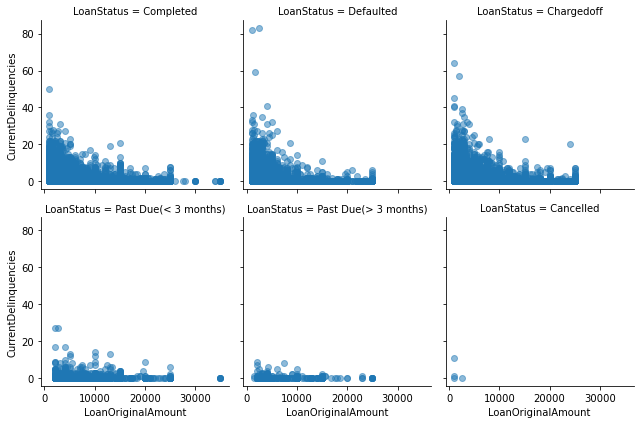

In [86]:
facetgrid(df, 'LoanOriginalAmount','CurrentDelinquencies')

> The plots showed there was a possibility of a borrower with current delinquencies between zero and 40, who borrowed between \$1k to \\$2.5k to complete their loan payments, while borrowers with current delinquencies as high as 60 might get their loans chargedoff, and if up to 80, defaulted.

How did loan amount and categories of listing made by borrower influence loan status?

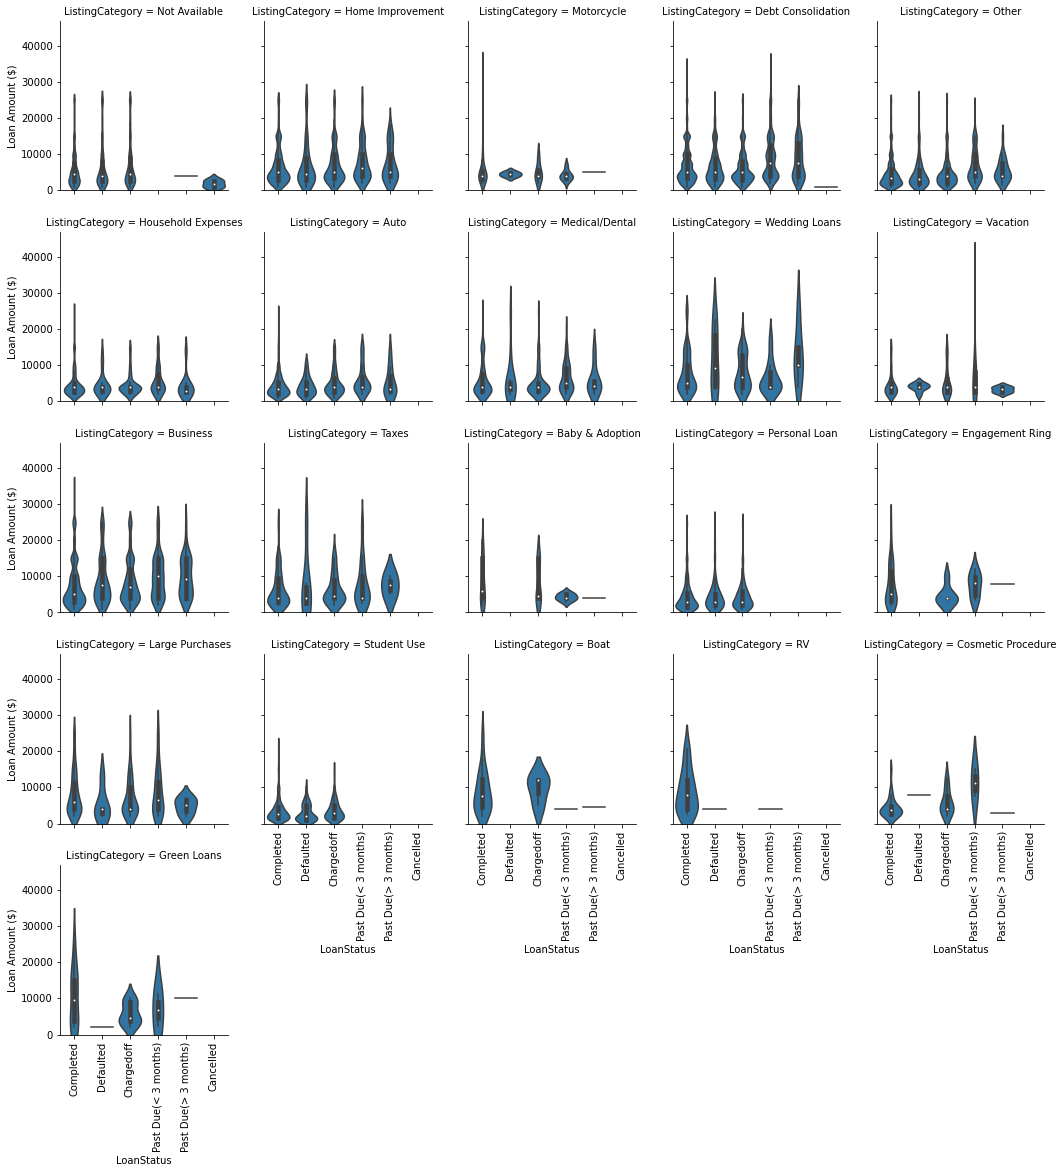

In [87]:
a = sb.FacetGrid(data = df, col = 'ListingCategory', col_wrap = 5)
a.map(sb.violinplot, 'LoanStatus', 'LoanOriginalAmount',
          order = ['Completed','Defaulted','Chargedoff','Past Due(< 3 months)','Past Due(> 3 months)','Cancelled'])
a.set_xticklabels(rotation = 90)
a.set(ylim = (0))
a.set_ylabels('Loan Amount ($)');

> Those who got an average of \$5k loans for home improvement, business, boat, and RV have a higher possiblity of completing loans, likewise those who got the loans for auto, personal loans, student use and comestic procedure who got below \\$5k loan amount had a higher possiblity of completing their loans above others.

How did loan amount and loan monthly payment influence loan status?

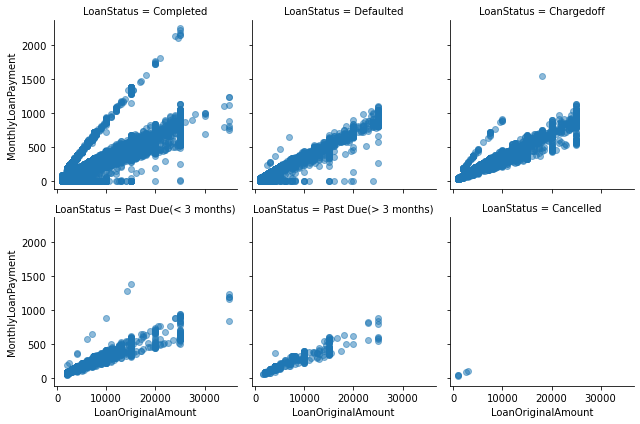

In [88]:
facetgrid(df, 'LoanOriginalAmount', 'MonthlyLoanPayment')

> The monthly loan payments of borrowers who completed their loans tend to be higher than others whose loans were not completed. It was also observed that even at lesser loan amount (less than \$30k), the monthly loan payment for some of the completed loans were as high as above \\$2k when they borrowed about \\$25k; that was almost ten percent of the amount borrowed.

How did loan status vary with number of investors and loan amount?

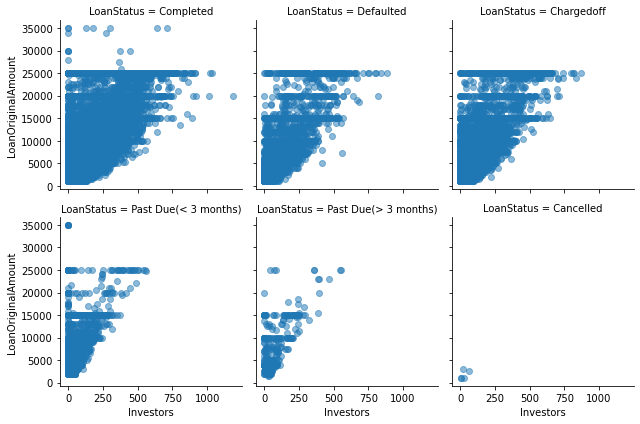

In [89]:
facetgrid(df, 'Investors', 'LoanOriginalAmount')

> A number of completed loans had a higher number of investors than others. For loans of about \$20k, some completed loans had number of investors higher than 1000. Defaulted loans had a number of investors at this loan amount too, but had just about 750 number of investors.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The correlation between loan amount and loan status was further explored by comparing the loan amount with other variables against loan status. It was observed in most of the plots that though the loan amount as a standalone variable is not strongly correlated with loan status, when compared it other variables, there seemed to be a strong connection between them.

### Were there any interesting or surprising interactions between features?

> It was observed that as some variables increased in amount, there tend to be a decrease in the other, and while there were increases in some, there were no changes in others. For example, while loan status seemed influenced by amount invested by friends and loan amount, there were completed loans with very high loan amount and zero amount invested by friends. Similar thing was also observed in investors/loan amount against loan status relationship. While loan amount at about \$25k had about 1000 number of investors, loan amount as high as \\$35k had just 1 investor and was completely paid off.

## Summary
The prosper loan data after taken through some wrangling processes was explored to determine the correlation between its variables and the factors that might influence if loans would be completed, chargedoff, defaulted or pass due dates.
The loan amount as a standalone variable did not seem much correlated with loan status, but when explored with other variables, a strong correlation was observed. The APR and interest rate variables were strongly positively correlated with each other, it seemed the interest rate is a strong determinant of the annual percentage rate. The amount repaid monthly by borrowers was also strongly correlated with loan amount. Number of investors, delinquencies and debt to income ratio variables were observed to strongly influence loan status.
Income range and listing categories when explored with loan amount also seemed to influence loan status, though their influences were not very obvious when explored against loan status alone. There seemed to be little correlation between quarters, terms and loan status when explored alone and in conjuction with loan amount.

## Conclusions
> From above explorations, it could be deduced that borrowers who borrowed up to \\$20k loan amount and had about \\$15k to \\$25k amount invested by friends had a very high change of completing their loans compared to those who might had below \\$15k invested amount which could turn out being chargedoff or below \\$10k invested amount which could turn out being defaulted.
Also, borrowers who borrowed above \\$25k and have a verifiable monthly income of at least \\$20k had a higher chance of completing their loans, while, a lower income earner (below \\$20k) borrowing the same amount might end up with a chargedoff loan or below \\$10k income; defaulted.
Borrowers with income range above \\$100k who borrowed less than \\$10k, or who earned between \\$75-99k and borrowed less than \\$8k, or earned between \\$50k-74K and borrowed an average of \\$7k might complete their loans. Also, borrowers earning within range \\$25k-49k or below who borrowed less than \\$6k loan might complete their loan payment and borrowers having current delinquencies greater than 40 might end up with defaulted or chargedoff loans, while those having current delinquencies as high as 80 might have their loans defaulted.

> Borrowers who borrowed an average amount of \\$5k and listed home improvement, business, boat, or Rv as category, or below \\$5k and listed auto, personal loans, student use or comestic procedure as the reason for applying for loans had a higher chance of completely repaying their loans compared to other categories.

> Also, borrowers who paid close to 10% amount borrowed monthly had a very great chance of completing their loans.

> Borrowers who borrowed up to \\$15k loan amount and also had number of investors greater than 750, had higher changes of completing their loans over borrowers with small number of investors and higher amount.